# CAP 5768 - Data Science - Dr. Marques - Fall 2019

# Assignment 1: The Python data science stack 
Name: Whitney Angelica Johanna Andrews
## Solutions

### Goals 

- To get acquainted with Python and Jupyter notebooks.
- To acquire a basic understanding of the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To have an early experience of manipulating, summarizing, and visualizing small datasets. 
- To demonstrate the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.


### Instructions

- This assignment is structured as a game, with three levels of increasing complexity.
- For each level, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 320 (plus up to 44 bonus points), distributed as follows: Level 1 (82 pts), Level 2 (70+ pts), Level 3 (132+ pts) and Conclusions (36 pts).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 
- Remember: this is an early exercise in exploring datasets; learning the syntax and "tricks" of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to test simple hypotheses and produce answers to simple questions that **you know you should be able to answer** because the answer can be pulled from the data.
- This is not (yet) the time to do sophisticated statistical analysis, train ML models, etc. 

------------
## Level 1: Presidents of the USA

The Python code below will load a dataset containing the names of the first 44 presidents of the USA and their heights, available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values.

In [0]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

from scipy.stats import pearsonr

In [0]:
file = 'data/president_heights.csv'
presidents = pd.read_csv(file) 
presidents

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


## Your turn! (8 points)

Write code to display the histogram (4 pts) of president's heights and compute summary statistics (4 pts): 

- Mean height
- Standard deviation
- Minimum height, and 
- Maximum height.

## Solution

mean: 179.73809523809524  standard dev: 7.015868855358296
min: 163  max: 193


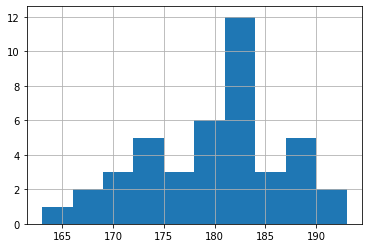

In [0]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...
#179.73809523809524  mean
#7.015868855358296  std
#163 min
#193 max
print('mean:',presidents['height(cm)'].mean(),' standard dev:', presidents['height(cm)'].std())
print('min:', presidents['height(cm)'].min(),' max:',presidents['height(cm)'].max())
%matplotlib inline
presidents['height(cm)'].hist()


## Your turn! (18 points)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):

1. Who was(were) the tallest president(s)?
2. Who was(were) the shortest president(s)?
3. How many presidents were 6' tall or taller?

## Solution

In [0]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...
print(presidents.loc[presidents['height(cm)']==presidents['height(cm)'].max()]) #Abraham Lincoln and Lyndon B. Johnson
print(presidents.loc[presidents['height(cm)']== presidents['height(cm)'].min()]) #James Madison
print(len(presidents.loc[presidents['height(cm)']>=182.88])) #18

    order               name  height(cm)
15     16    Abraham Lincoln         193
33     36  Lyndon B. Johnson         193
   order           name  height(cm)
3      4  James Madison         163
18


-------------

This is an extremely small, simple and manageable dataset. 

Let's use it to prove a silly hypotheses, for example: 

"H1: Even-numbered presidents are, in average, taller than odd-numbered ones." 

## Your turn! (24 points)

Write Python code to test hypothesis H1.

## Solution

In [0]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...
even=presidents[presidents['order']%2==0]
odd=presidents[presidents['order']%2!=0]

even=even.reset_index(drop=True)
odd=odd.reset_index(drop=True)

avg_height_even=round((even['height(cm)'].mean()),2)
avg_height_odd=round((odd['height(cm)'].mean()),2)

#Test hypothesis
print(avg_height_even > avg_height_odd) #False

False


## Question 1 (4 points)

Was hypothesis H1 confirmed or refuted?

## Solution

(ENTER YOUR ANSWER HERE)

It was False.

---------------------

Now it's time for you to come up with a different (but also silly) hypotheses, which we will call H2. **Be creative!**

Hypothesis 2: First 10 presidents are shorter than the rest on average.

## Your turn! (28 points)

Write Python code to test hypothesis H2 (and some text to explain whether it was confirmed or not).

## Solution

In [0]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...
# Hypothesis 2: First 10 presidents are shorter than the rest on average.
first_ten = presidents[0:10]
first_ten_avg = first_ten['height(cm)'].mean()
rest = presidents[10:len(presidents)]
rest_avg = rest['height(cm)'].mean()
print(first_ten_avg < rest_avg) #True

True


-------------------
## Level 2: HR payroll

The Python code below will load a dataset containing the salaries and demographic data of more than 1000 employees of a hypothetical company, available in the file *salaries.csv*, which is a simple comma-separated list of labels and values.

In [0]:
salaries = pd.read_csv('data/salaries.csv') 
print(salaries.shape)
print(salaries.count())

(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


## Question 2 (6 points)

What is the meaning of each of the six variables/features stored along the columns of the dataset?

## Solution

In [0]:
salaries.info()
print(type(salaries.sex[1]))
print(type(salaries.race[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 6 columns):
earn      1192 non-null float64
height    1192 non-null float64
sex       1192 non-null object
ed        1192 non-null int64
age       1192 non-null int64
race      1192 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 56.0+ KB
<class 'str'>
<class 'str'>


(ENTER YOUR ANSWER HERE)

earn: float64 type

height: float64 type

sex: string object

ed: int64 type

age: int64 type

race: string object

--------------------

Let's explore the dataset by plotting some graphs and displaying summary statistics. 

The code below should display:
- Min, max, average, and median salary (global)
- A histogram of salaries
- A scatterplot correlating salaries and years of education
- The (Pearson) correlation coefficient between the two variables.

This should help us get started.

In [0]:
salary = np.array(salaries['earn'])
print("Salary statistics")
print("Minimum salary (global):", np.min(salary))
print("Maximum salary (global):", np.max(salary))
print("Average salary (global):", np.mean(salary))
print("Median  salary (global):", np.median(salary))

Salary statistics
Minimum salary (global): 200.0
Maximum salary (global): 200000.0
Average salary (global): 23154.773489932886
Median  salary (global): 20000.0


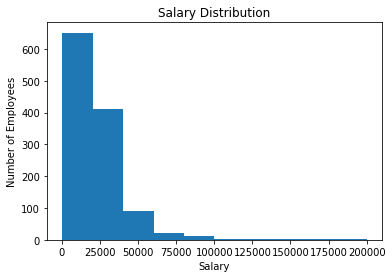

In [0]:
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

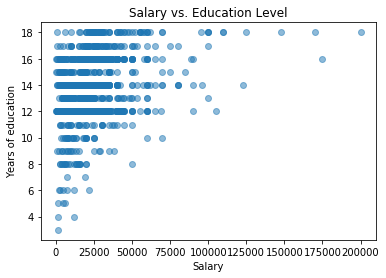

In [0]:
years = np.array(salaries['ed'])
plt.title('Salary vs. Education Level')
plt.xlabel('Salary')
plt.ylabel('Years of education');
plt.scatter(salary, years, alpha=0.5)
plt.show()

In [0]:
# Compute Pearson coefficient
from scipy.stats import pearsonr
corr, _ = pearsonr(salary,years)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.3399765246894845


The Pearson correlation coefficient (a value between -1 and 1) can be used to summarize the strength of the linear relationship between two data samples.

A simplified way to interpret the result is:
- A value of 0 means no correlation
- Values below -0.5 or above 0.5 indicates a notable (negative/positive) correlation

## Your turn! (16+ points)

Write code to:

1. Display the total headcount and the number (and %) of male and female employees. (4 pts)
2. Compute and display the min, max, average, and median salary *per gender*. (12 pts)
3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (*if any is present*) associated with the salaries in the company. (<= 16 bonus points)


## Solution

In [0]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...
female_df=salaries[salaries['sex']=='female']
male_df=salaries[salaries['sex']=='male']

male_df=male_df.reset_index(drop=True)
female_df = female_df.reset_index(drop=True)

total=len(salaries)

percent_male=round((len(male_df)/total),4) #42.37%
print("Percent male head count: ", percent_male*100,"%")
percent_female=round((len(female_df)/total),4) #57.63%
print("Percent female head count: ", percent_female*100,"%")

print("Gender Summary Statistics")
print("Minimum salary (male):", male_df['earn'].min())
print("Minimum salary (female):", female_df['earn'].min())
print("Maximum salary (male):", male_df['earn'].max())
print("Maximum salary (female):", female_df['earn'].max())
print("Average salary (male):", male_df['earn'].mean())
print("Average salary (female):", female_df['earn'].mean())
print("Median  salary (male):", male_df['earn'].median())
print("Median  salary (female):", female_df['earn'].median())

Percent male head count:  42.370000000000005 %
Percent female head count:  57.63 %
Gender Summary Statistics
Minimum salary (male): 1000.0
Minimum salary (female): 200.0
Maximum salary (male): 200000.0
Maximum salary (female): 123000.0
Average salary (male): 29786.130693069306
Average salary (female): 18280.195050946142
Median  salary (male): 25000.0
Median  salary (female): 15000.0


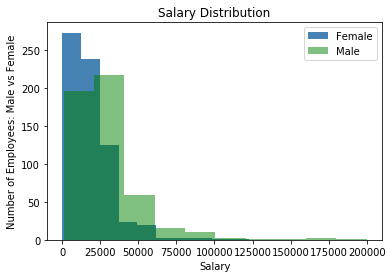

In [0]:
plt.hist(female_df.earn, color='steelblue', label='Female')
plt.hist(male_df.earn, alpha=0.5, color='green', label='Male')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees: Male vs Female');
plt.legend();

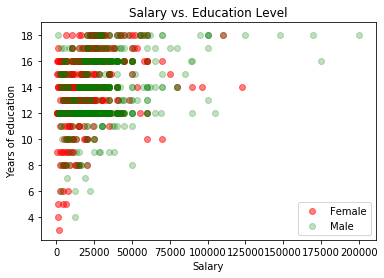

In [0]:
years_fm = np.array(female_df['ed'])
years_ml = np.array(male_df['ed'])
salary_fm = np.array(female_df['earn'])
salary_ml = np.array(male_df['earn'])
plt.title('Salary vs. Education Level')
plt.xlabel('Salary')
plt.ylabel('Years of education');
plt.scatter(salary_fm, years_fm, alpha=0.5,color='red', label='Female')
plt.scatter(salary_ml, years_ml, alpha=0.25,color='green',label='Male')
plt.legend()
plt.show()

--------------------

As you can possibly tell by now, this dataset may help us test hypotheses and answer questions related to possible sources of inequality associated with the salary distribution: gender, age, race, height. 

Let's assume, for the sake of argument, that the number of years of education should correlate well with a person's salary (this is clearly a weak argument and the plot and Pearson correlation coefficient computation above suggests that this is *not* the case) and that other suspiciously high (positive or negative) correlations could be interpreted as a sign of inequality.

---------------------

At this point, formulate 3 different hypotheses that might suggest that the salary distribution is biased by factors such as ageism. 

Call these hypotheses H3, H4, and H5. 

**Be creative, but realistic! These should be reasonable hypotheses, not silly ones!**

Older you are, the more you earn.
Your height determines what you earn.
Your race and se determine how much you earn. 


## Your turn! (48+ points)

Write Python code to test hypotheses H3, H4, and H5 (and some text to explain whether they were confirmed or not). Feel free to (also) use plots, but make your code independent of a human being interpreting those plots. (16 pts per hypothesis with additional <= 8 bonus points per hypotheses).  

## Solution

Correlation coefficient Age:  0.08100297364190615
Correlation coefficient Height:  0.3399765246894845


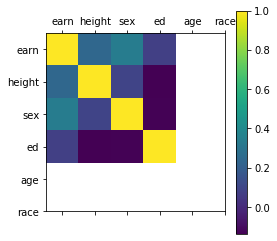

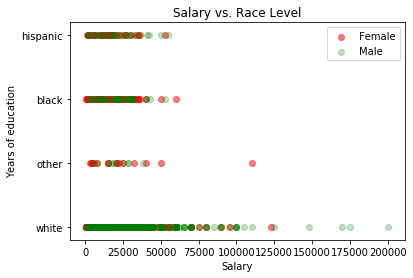

In [0]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...
height = np.array(salaries['height'])
race=np.array(salaries['race'])
age=np.array(salaries['age'])

#height has a high correlation to salary than age does, however, both are correlated. 
corr1, _ = pearsonr(salary,age)
print('Correlation coefficient Age: ',corr1)

corr3, _ = pearsonr(salary,height)
print('Correlation coefficient Height: ',corr)

# This scatter plot shows that sex and earn had a high correlation
plt.matshow(salaries.corr())
plt.xticks(range(len(salaries.columns)), salaries.columns)
plt.yticks(range(len(salaries.columns)), salaries.columns)
plt.colorbar()
plt.show()

#This shows the concentration of race and gender compared to salary earnings. \
# The white races in male seem to make more money than others. 
female_race=np.array(female_df['race'])
male_race=np.array(male_df['race'])
plt.title('Salary vs. Race Level')
plt.xlabel('Salary')
plt.ylabel('Years of education');
plt.scatter(salary_fm, female_race, alpha=0.5,color='red', label='Female')
plt.scatter(salary_ml, male_race, alpha=0.25,color='green',label='Male')
plt.legend()
plt.show()

-------------------
## Level 3: Fuel consumption

The Python code below will load a dataset containing fuel consumption data for ~400 vehicles produced in the 1970s and the 1980s along with some characteristic information associated with each model. 

Here, *displacement* refers to a vehicle's engine size and the fuel efficiency is measured in miles per gallon (mpg).

See:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG for additional information.

In [0]:
sns.set(style='ticks', palette='Set2')
%matplotlib inline

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)
# df1 = data[data.isna().any(axis=1)]
# print(df1) ## 14 rows returned with NaN values 

(406, 9)


In [0]:
data.dropna(inplace=True)
data.head()
# df2 = data[data.isna().any(axis=1)]
# print(df2) ## there could be no columns returned becaue NaN is dropped
data.shape

(392, 9)

## Question 3 (6 points)

What was the net effect of the line of code

``data.dropna(inplace=True)``?

## Solution

(ENTER YOUR ANSWER HERE)

Drops the rows where Na is included and then resets the index in place. If row three has a Na, then that row is dropped and then the index would read (1,2,4,5), so the inplace rests the remaining contents index (1,2,3,4). In other words, the data is renamed in place. 

## Your turn! (18+ points)

Write code to:

1. Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (12 pts)
2. Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (6 pts)
3. (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 4 points)


## Solution

In [0]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...
count=len(data[(data['cylinders']==3.0) | (data['cylinders']==5.0)])
data=data.drop(data[(data['cylinders']==3.0) | (data['cylinders']==5.0)].index)

holder=data.loc[(data['cylinders'] == 4.0) | (data['cylinders'] == 6.0) | (data['cylinders'] == 8.0)]
print("Average: ", holder.mpg.mean())
print("Min: ", holder.mpg.min())
print("Max: ", holder.mpg.max())
print("Min: ","\n",holder.loc[holder['mpg']==holder.mpg.min()])
print("Max:","\n", holder.loc[holder['mpg']==holder.mpg.max()])
print("Number of 3.0 and 5.0 cylinder: ", count)


Average:  23.445454545454545
Min:  9.0
Max:  46.6
Min:  
     mpg  cylinders  displacement  horsepower  weight  acceleration  model  \
34  9.0        8.0         304.0       193.0  4732.0          18.5   70.0   

    origin  car_name  
34     1.0  hi 1200d  
Max: 
       mpg  cylinders  displacement  horsepower  weight  acceleration  model  \
329  46.6        4.0          86.0        65.0  2110.0          17.9   80.0   

     origin   car_name  
329     3.0  mazda glc  
Number of 3.0 and 5.0 cylinder:  7


--------------------

This dataset may help us test hypotheses and answer questions related to fuel consumption. 

To get started: Which features of a vehicle correlate best with its mpg --  *displacement*, *weight*, or *horsepower*?

## Your turn! (48 points)

Write Python code to plot the relationship between:

1. Fuel consumption and displacement (engine size)
2. Fuel consumption and weight
3. Fuel consumption and horsepower (HP)


## Solution

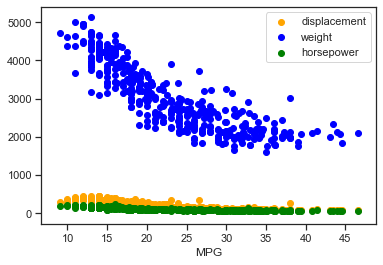

In [0]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...
mpg=data['mpg']
dis=data['displacement']
weight=data['weight']
hp=data['horsepower']

plt.scatter(mpg,dis,color='orange', label='displacement')
plt.scatter(mpg,weight, color='blue', label='weight')
plt.scatter(mpg,hp, color='green', label='horsepower')
plt.xlabel('MPG')
plt.legend()
plt.show()

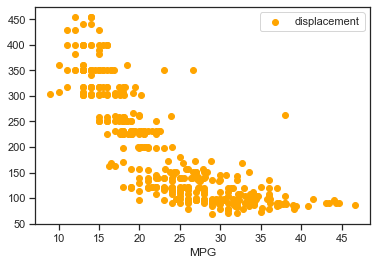

In [0]:
plt.scatter(mpg,dis,color='orange', label='displacement')
plt.xlabel('MPG')
plt.legend()
plt.show()

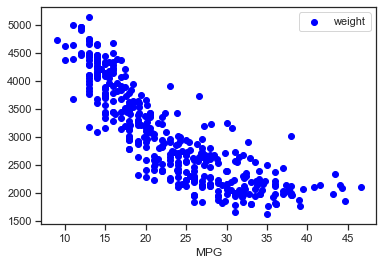

In [0]:
plt.scatter(mpg,weight, color='blue', label='weight')
plt.xlabel('MPG')
plt.legend()
plt.show()

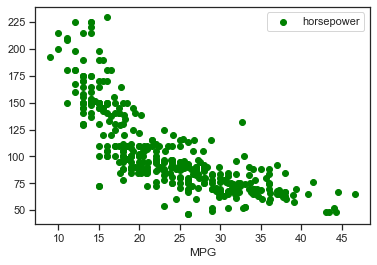

In [0]:
plt.scatter(mpg,hp, color='green', label='horsepower')
plt.xlabel('MPG')
plt.legend()
plt.show()

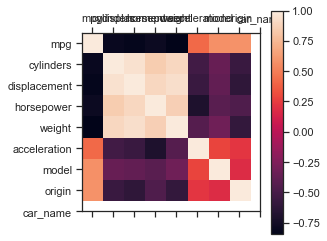

Correlation coefficient  Displacement:  -0.817887362940059
Correlation coefficient Weight:  -0.8426809031318667
Correlation coefficient Horsepower:  -0.7802588157322385


In [0]:
plt.matshow(data.corr())
plt.xticks(range(len(data.columns)), data.columns)
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()
plt.show()
corr4, _ = pearsonr(data.mpg,data.displacement)
print('Correlation coefficient  Displacement: ',corr4)
corr5, _ = pearsonr(data.mpg,data.weight)
print('Correlation coefficient Weight: ',corr5)
corr6, _ = pearsonr(data.mpg,data.horsepower)
print('Correlation coefficient Horsepower: ',corr6)

## Questions 4-6 (30 points, i.e. 10 points each)

For each of the three cases above, use the plots to answer the questions below:

4. Is there a correlation between mpg and displacement? If so: is it positive or negative? linear or non-linear?


5. Is there a correlation between mpg and weight? If so: is it positive or negative? linear or non-linear?


6. Is there a correlation between mpg and horsepower? If so: is it positive or negative? linear or non-linear?




## Solution

(ENTER YOUR ANSWERS HERE)

4. Is there a correlation between mpg and displacement? If so: is it positive or negative? linear or non-linear?

Negative non-linear correlation.

5. Is there a correlation between mpg and weight? If so: is it positive or negative? linear or non-linear?

Yes negative non-linear correlation. 

6. Is there a correlation between mpg and horsepower? If so: is it positive or negative? linear or non-linear?

yes negative non-linear correlation. 



## Questions 7-8 (30 points, i.e. 15 points each)

Write Python code to produce (box)plots that should provide good answers the questions below:

7. Did vehicles get more efficient over the years (represented in this dataset, i.e., 1970 through 1982)?
8. Are Japanese cars more fuel efficient than American or European ones?

Hint: 

``data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])``



## Solution

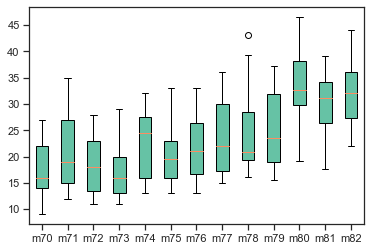

In [0]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

data.model.unique()
m70 = data.loc[data['model'] == 70.]
m71=data.loc[data['model'] == 71.]
m72=data.loc[data['model'] == 72.]
m73 = data.loc[data['model'] == 73.]
m74=data.loc[data['model'] == 74.]
m75=data.loc[data['model'] == 75.]
m76 = data.loc[data['model'] == 76.]
m77=data.loc[data['model'] == 77.]
m78=data.loc[data['model'] == 78.]
m79 = data.loc[data['model'] == 79.]
m80=data.loc[data['model'] == 80.]
m81=data.loc[data['model'] == 81.]
m82=data.loc[data['model'] == 82.]
box_plot_data=[m70.mpg,m71.mpg,m72.mpg,m73.mpg,m74.mpg,m75.mpg,m76.mpg,m77.mpg,m78.mpg,m79.mpg,m80.mpg,m81.mpg,m82.mpg] 
plt.boxplot(box_plot_data,patch_artist=True,labels=['m70','m71','m72','m73','m74','m75','m76','m77','m78','m79','m80','m81','m82'])
plt.show()
# In general, vehicles became more fuel efficient over time, but it is not a linear relationship. 
# The 80's had the most fuel efficient cars.

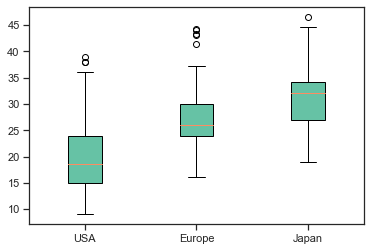

In [0]:
data['country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
# data.info()
# holder=newData.loc[(newData['cylinders'] == 4.0) | (newData['cylinders'] == 6.0) | (newData['cylinders'] == 8.0)]
usa = data.loc[data['origin'] == 1]
europe=data.loc[data['origin'] == 2]
japan=data.loc[data['origin'] == 3]
box_plot_data=[usa.mpg,europe.mpg,japan.mpg]
plt.boxplot(box_plot_data,patch_artist=True,labels=['USA','Europe','Japan'])
plt.show()
# In general, the Japanese cars are more fuel efficient than American and European.

## Conclusions (36 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

(WRITE YOUR CONCLUSIONS HERE)

 I learned to visualize data in a meaningful way from extracting information from tabular data.
 
 The most fun was to plot the correlations in a color map. The most tedious was to isolated the necesssary information (like seperating the information if female or male). The most enlightening was to figure out the graphs to explain conclusions gathered from the data. The most time consuming was cleaning up the code. 
 
 If I had an additional week to work on this, I would probably play with the idea of making a statistical model to gain new insights on the data and figure out more ways to get meaningful measurements. 